# Invasive species

# Setup

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = os.path.join('data', 'sample') + '/'
# PATH = os.path.join('data') + '/'

In [4]:
def delete_ds_store():
    for root, dirs, files in os.walk(PATH):
        i = 0
        for file in files:
            if file.endswith('.DS_Store'):
                path = os.path.join(root, file)

                print("Deleting: %s" % (path))

                if os.remove(path):
                    print("Unable to delete!")
                else:
                    print("Deleted...")
                    i += 1

    print("Files Deleted: %d" % (i))



## Create model

In [11]:
label_csv = os.path.join(PATH, 'train_labels.csv')
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [15]:
val_idxs

array([8, 1])

In [6]:
delete_ds_store()

Files Deleted: 0


In [16]:
size = 128
arch=resnet34
tfms = tfms_from_model(resnet34, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms, test_name='test', suffix='.jpg', val_idxs=val_idxs)
learn = ConvLearner.pretrained(arch, data, precompute=False)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[0.      0.98552 0.7594  0.5    ]



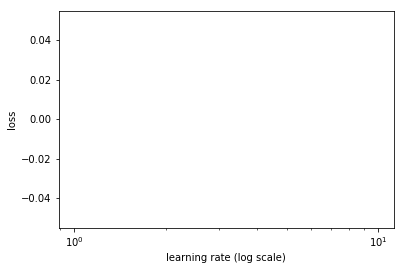

In [17]:
lrf=learn.lr_find()
learn.sched.plot()

In [18]:
learning_rate = 1e-2

In [19]:
learn.fit(learning_rate, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.63898 0.73337 0.5    ]
[1.      0.67229 0.71124 0.5    ]
[2.      0.60542 0.67958 0.5    ]



## Training

In [ ]:
learn.unfreeze()

In [ ]:
lr=np.array([learning_rate/9,learning_rate/3,learning_rate])

In [ ]:
learn.fit(lr, 5, cycle_len=1, cycle_mult=2)

In [ ]:
learn.save('finetuning_412_div_3')

## Analysis

In [ ]:
log_preds,y = learn.TTA()
preds = np.argmax(log_preds, axis=1)
probs = np.mean(np.exp(log_preds), axis=0)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)

## Submission

In [ ]:
test_log_predictions, _ = learn.TTA(is_test=True)
test_predictions = np.argmax(test_log_predictions, axis=1)
test_predictions_classes = [data.classes[pred] for pred in test_predictions]
test_file_names = learn.data.test_ds.fnames

with open('submission.csv', 'w') as the_file:
    the_file.write('name,invasive\n')
    for file_path, prediction in zip(test_file_names, test_predictions_classes):
        file_name = file_path.split('/')[-1]
        the_file.write(file_name)
        the_file.write(",")
        the_file.write(prediction)
        the_file.write("\n")
the_file.close()

from IPython.display import FileLink
FileLink('submission.csv')

